<a href="https://colab.research.google.com/github/ChauQueBinh/20130204_ChauQueBinh_ML/blob/main/17_NguyenHoangHai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML_2023'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML_2023


Khao sat du lieu

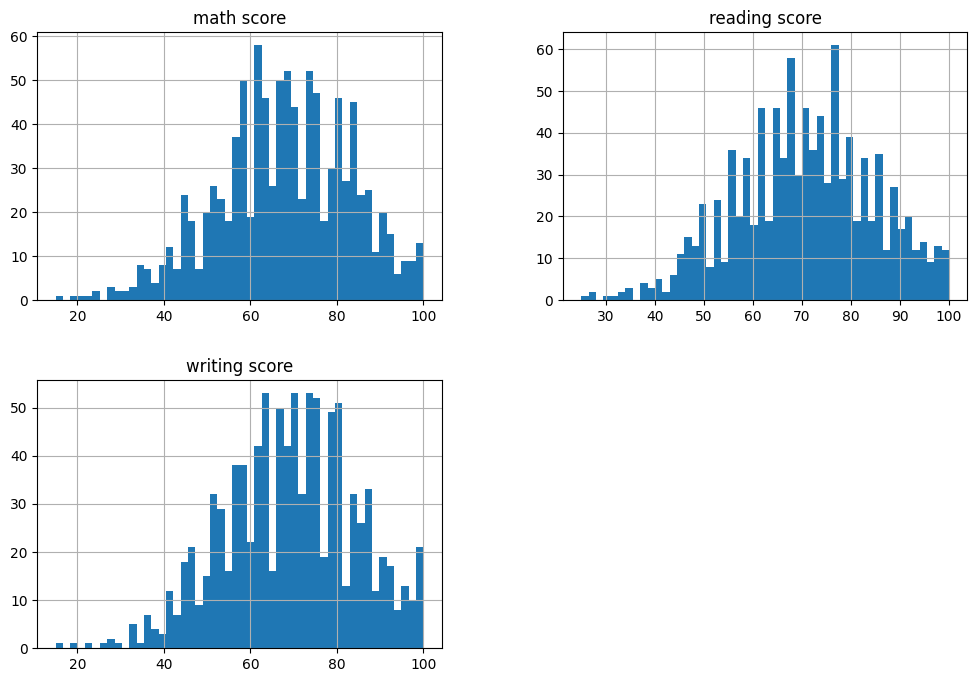

In [8]:
df=pd.read_csv("exams.csv")
df.head(10)
df.hist(bins=50 ,figsize=(12,8))
plt.show()

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [11]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [13]:
df['gender'].value_counts()

male      508
female    492
Name: gender, dtype: int64

In [14]:
df['race/ethnicity'].value_counts()

group C    323
group D    257
group B    198
group E    143
group A     79
Name: race/ethnicity, dtype: int64

In [15]:
df['parental level of education'].value_counts()

some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: parental level of education, dtype: int64

In [16]:
df['lunch'].value_counts()

standard        660
free/reduced    340
Name: lunch, dtype: int64

In [17]:
df['test preparation course'].value_counts()

none         656
completed    344
Name: test preparation course, dtype: int64

<Axes: xlabel='race/ethnicity', ylabel='math score'>

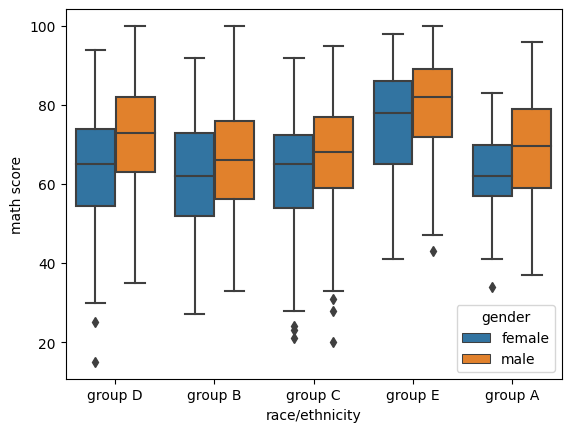

In [18]:
sns.boxplot(x='race/ethnicity',y='math score',data=df,hue='gender')

<Axes: xlabel='race/ethnicity', ylabel='reading score'>

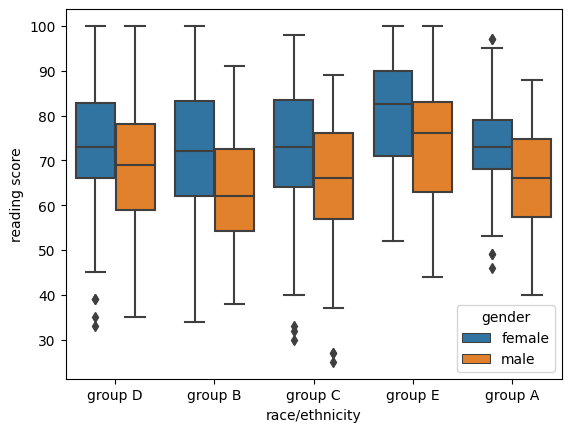

In [19]:
sns.boxplot(x='race/ethnicity',y='reading score',data=df,hue='gender')

<Axes: xlabel='race/ethnicity', ylabel='writing score'>

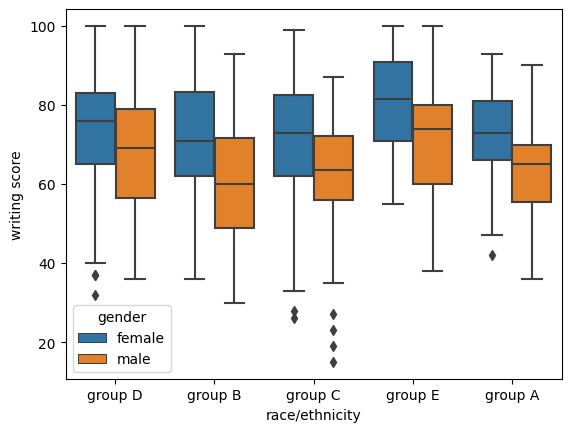

In [20]:
sns.boxplot(x='race/ethnicity',y='writing score',data=df,hue='gender')

In [5]:
# Neural network	
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
import matplotlib.pyplot as plt # vẽ biểu đồ
import numpy as np # tính toán xử lý số học
import pandas as pd # đọc dữ liêu
from sklearn.preprocessing import LabelEncoder # dán nhãn thuộc tính

import seaborn as sns # giống matplotlib dùng dể vẽ biểu đồ và trực quan hóa dữ liệu
from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report, confusion_matrix

from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from tensorflow import keras
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [36]:



df=pd.read_csv("exams.csv")
df.head(10)

for c in df.columns:
    if df[c].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)

df['math score'] = pd.cut(df['math score'], bins=[0, 50, 75, 100], labels=[0, 1, 2])
df['reading score'] = pd.cut(df['reading score'], bins=[0, 50, 75, 100], labels=[0, 1, 2])
df['writing score'] = pd.cut(df['writing score'], bins=[0, 50, 75, 100], labels=[0, 1, 2])
df.head(20)
#gender                         0:female  1:male

#ethnicity                      0:A 1:B 2:C 3D: 4:E

#parental level of Education    0:associates degree 
#                               1:Bachelor
#                               2:high school
#                               3:master
#                               4:some college 
#                               5:high school

#lunch                          0:standart 1:free/reduced

#test preparation course        0:completed 1:none
#math, reading,writing          0:0->50 1:50->75 2:75->100

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,3,4,1,0,1,1,2
1,1,3,0,1,1,2,2,2
2,0,3,4,0,1,1,2,2
3,1,1,4,0,1,1,1,1
4,0,3,0,1,1,2,2,2
5,1,2,5,1,1,1,1,1
6,0,4,0,1,1,2,2,2
7,0,1,5,1,1,0,1,1
8,1,2,5,1,1,2,1,1
9,0,2,1,1,0,1,1,2


In [37]:
def build_and_eval_model(clf,tager):
    # lấy dữ liệu
    df=pd.read_csv("exams.csv")
    # xử lý dữ liệu 
    for c in df.columns:
        if df[c].dtype=='object': 
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    df['math score'] = pd.cut(df['math score'], bins=[0, 50, 75, 100], labels=[0, 1, 2])
    df['reading score'] = pd.cut(df['reading score'], bins=[0, 50, 75, 100], labels=[0, 1, 2])
    df['writing score'] = pd.cut(df['writing score'], bins=[0, 50, 75, 100], labels=[0, 1, 2])
    # Tách dữ liệu thành biến input X và output y
    # target colums tager 
    target_col = tager
    X = df.drop([target_col], axis=1)
    y = df[target_col]
    # Phân chia dữ liệu, bảo tồn tỷ lệ phân lớp (stratify=y).
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
     # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test  = scaler.transform(X_test)
    # Khởi tạo mô hình
    model = clf
    # Đánh giá mô hình bằng Kiểm chứng chéo trên Training Set
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    cv_scores = pd.DataFrame(scores).iloc[:, 2:]
    print('A. Cross Validation on Training Set')
    print(cv_scores.describe())
    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    # Dùng mô hình dự đoán trên Test Set
    y_pred = model.predict(X_test)
    # Đánh giá kết quả dự đoán của mô hình trên Test Set
    final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test, y_pred),],
                                 'precision': [precision_score(y_test, y_pred,average ='macro')],
                                 'recall': [recall_score(y_test, y_pred,average ='macro')],
                                 'f1': [f1_score(y_test, y_pred,average ='macro')]})
    print('B. Final Validation on Test Set')
    print(final_scores.to_string(index=False))
    # Trực quan hóa kết quả đánh giá
    fig, ax = plt.subplots(figsize=(8,6))
    final_scores.plot(kind='bar', ax=ax)
    # Đặt tiêu đề cho biểu đồ và các trục
    plt.title(clf)
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.show()
    # ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [38]:
#Kiểm tra có ô nào bị thiếu dữ liệu trong dataset
print(df.isnull().sum())

# Đếm số hàng trùng lặp
print(df.duplicated().sum())

# Xóa các hàng trùng lặp (có 1103 hàng)
df.drop_duplicates(inplace=True)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
415


In [39]:
# Lấy ra danh sách tên các đặc trưng định lượng và định tính
numerical = df.drop(columns=['math score']).select_dtypes(include=np.number).columns.tolist()
categorical = df.drop(columns=['math score']).select_dtypes(object).columns.tolist()

In [40]:
# Tạo các transformer cho các cột dữ liệu số và phân loại
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Kết hợp các transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical),
        ('cat', cat_transformer, categorical)
    ])
# Tạo pipeline để kết hợp các bước chuyển đổi và trích chọn đặc trưng
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(mutual_info_classif, k=5))
])

# Áp dụng pipeline cho tập dữ liệu
X = df.drop(['math score'], axis=1)
y = df['math score']

X_selected = pipe.fit_transform(X, y)
# print(X_selected)

In [41]:
input_dim = X_selected.shape[1]
num_classes=y.nunique()

In [47]:
normalizer = Normalizer()

x = normalizer.fit_transform(X_selected)
y_integer = y.astype('category').cat.codes
y_categorical = keras.utils.to_categorical(y_integer, num_classes)

X_train, X_test, y_train, y_test = train_test_split(x, y_categorical, test_size=0.25, stratify=y_categorical, random_state=0)

optimizer = ['Adam', 'SGD', 'RMSprop']
batch_size = [32,64,128]
epochs = [15, 30, 60]
param_grid = {"optimizer":optimizer, "batch_size":batch_size, "epochs":epochs}

#Create a python function that returns a compiled DNN model
def create_dnn_model():
  model = Sequential()
  model.add(Dense(250,input_dim=input_dim, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  return model
  
#Use Keras wrapper to package the model as an sklearn object
model = KerasClassifier(build_fn=create_dnn_model)

grid_model = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, refit=True)

grid_model.fit(X_train, y_train)
best_model = grid_model.best_estimator_
print(best_model)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


4/4 [==============================] - 1s 3ms/step - loss: 1.0733 - accuracy: 0.4589
Epoch 2/15
4/4 [==============================] - 0s 3ms/step - loss: 1.0107 - accuracy: 0.5776
Epoch 3/15
4/4 [==============================] - 0s 3ms/step - loss: 0.9661 - accuracy: 0.5753
Epoch 4/15
4/4 [==============================] - 0s 3ms/step - loss: 0.9386 - accuracy: 0.5753
Epoch 5/15
4/4 [==============================] - 0s 3ms/step - loss: 0.9210 - accuracy: 0.5822
Epoch 6/15
4/4 [==============================] - 0s 3ms/step - loss: 0.9071 - accuracy: 0.5936
Epoch 7/15
4/4 [==============================] - 0s 5ms/step - loss: 0.8953 - accuracy: 0.5959
Epoch 8/15
4/4 [==============================] - 0s 3ms/step - loss: 0.8855 - accuracy: 0.6005
Epoch 9/15
4/4 [==============================] - 0s 3ms/step - loss: 0.8833 - accuracy: 0.6050
Epoch 10/15
4/4 [==============================] - 0s 3ms/step - loss: 0.8789 - accuracy: 0.6005
Epoch 11/15
4/4 [==============================] -

Epoch 1/30


<ipython-input-53-c9b917643c87>:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn=create_dnn_model, epochs=30, batch_size=64, verbose=1)


7/7 [==============================] - 0s 3ms/step - loss: 1.3006 - accuracy: 0.1858
Epoch 2/30
7/7 [==============================] - 0s 2ms/step - loss: 1.1547 - accuracy: 0.1907
Epoch 3/30
7/7 [==============================] - 0s 2ms/step - loss: 1.0176 - accuracy: 0.2274
Epoch 4/30
7/7 [==============================] - 0s 2ms/step - loss: 0.8966 - accuracy: 0.2641
Epoch 5/30
7/7 [==============================] - 0s 2ms/step - loss: 0.7839 - accuracy: 0.2812
Epoch 6/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.3325
Epoch 7/30
7/7 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.3741
Epoch 8/30
7/7 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.4132
Epoch 9/30
7/7 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.4523
Epoch 10/30
7/7 [==============================] - 0s 2ms/step - loss: 0.3649 - accuracy: 0.4792
Epoch 11/30
7/7 [==============================] -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


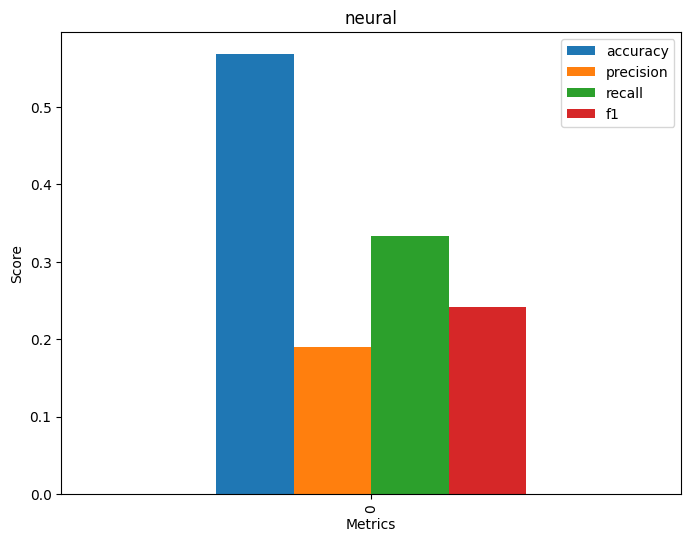

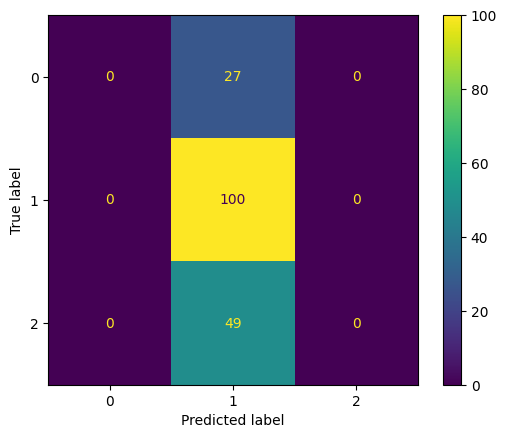

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

# target colums tager 
target_col = 'math score'
X = df.drop([target_col], axis=1)
y = df[target_col]
# Phân chia dữ liệu, bảo tồn tỷ lệ phân lớp (stratify=y).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Hàm để tạo mô hình mạng neural
def create_dnn_model():
    model = Sequential()
    model.add(Dense(10, input_dim=7, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Tạo đối tượng KerasClassifier
classifier = KerasClassifier(build_fn=create_dnn_model, epochs=30, batch_size=64, verbose=1)

# Sử dụng thuật toán mạng neural
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Đánh giá kết quả dự đoán của mô hình trên Test Set
final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test, y_pred),],
                                 'precision': [precision_score(y_test, y_pred,average ='macro')],
                                 'recall': [recall_score(y_test, y_pred,average ='macro')],
                                 'f1': [f1_score(y_test, y_pred,average ='macro')]})
print('B. Final Validation on Test Set')
print(final_scores.to_string(index=False))
# Trực quan hóa kết quả đánh giá
fig, ax = plt.subplots(figsize=(8,6))
final_scores.plot(kind='bar', ax=ax)
# Đặt tiêu đề cho biểu đồ và các trục
plt.title('neural')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()
# ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


In [51]:
# Define the neural network model
model = Sequential()
model.add(Dense(250,input_dim=X_selected.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# Đánh giá mô hình bằng Kiểm chứng chéo trên Training Set
# Define the cross-validation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Train and evaluate the model using cross-validation
scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in cv.split(X_selected, y):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_integer_train = y_train.astype('category').cat.codes
    y_integer_test = y_test.astype('category').cat.codes

    y_train_cat = keras.utils.to_categorical(y_integer_train, num_classes=8)
    y_test_cat = keras.utils.to_categorical(y_integer_test, num_classes=8)

    model.fit(X_train, y_train_cat, epochs=60, batch_size=128, verbose=1)
    
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    score = model.evaluate(X_test, y_test_cat, verbose=0)
    scores.append(score[1])

    y_check = np.array(y_integer_test)
    report = classification_report(y_check, y_pred_classes, output_dict=True)
    precision_scores.append(report['weighted avg']['precision'])
    recall_scores.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])

results = pd.DataFrame({
    'test_accuracy': scores,
    'test_precision_macro': precision_scores,
    'test_recall_macro': recall_scores,
    'test_f1_macro':  f1_scores
})

print(results)

# results.to_csv('{}_cv_scores.csv'.format(model.__class__.__name__), index=False)

Epoch 1/60
4/4 [==============================] - 0s 4ms/step - loss: 1.8618 - accuracy: 0.3611
Epoch 2/60
4/4 [==============================] - 0s 3ms/step - loss: 1.3916 - accuracy: 0.5577
Epoch 3/60
4/4 [==============================] - 0s 3ms/step - loss: 1.1647 - accuracy: 0.5705
Epoch 4/60
4/4 [==============================] - 0s 3ms/step - loss: 1.0557 - accuracy: 0.5791
Epoch 5/60
4/4 [==============================] - 0s 5ms/step - loss: 0.9995 - accuracy: 0.5812
Epoch 6/60
4/4 [==============================] - 0s 4ms/step - loss: 0.9621 - accuracy: 0.5791
Epoch 7/60
4/4 [==============================] - 0s 3ms/step - loss: 0.9418 - accuracy: 0.5705
Epoch 8/60
4/4 [==============================] - 0s 3ms/step - loss: 0.9324 - accuracy: 0.5769
Epoch 9/60
4/4 [==============================] - 0s 4ms/step - loss: 0.9190 - accuracy: 0.5833
Epoch 10/60
4/4 [==============================] - 0s 3ms/step - loss: 0.9131 - accuracy: 0.5855
Epoch 11/60
4/4 [======================

Epoch 1/60
4/4 [==============================] - 0s 3ms/step - loss: 1.0597 - accuracy: 0.4635
Epoch 2/60
4/4 [==============================] - 0s 3ms/step - loss: 0.9897 - accuracy: 0.5183
Epoch 3/60
4/4 [==============================] - 0s 3ms/step - loss: 0.9608 - accuracy: 0.5251
Epoch 4/60
4/4 [==============================] - 0s 3ms/step - loss: 0.9429 - accuracy: 0.5616
Epoch 5/60
4/4 [==============================] - 0s 3ms/step - loss: 0.9271 - accuracy: 0.5662
Epoch 6/60
4/4 [==============================] - 0s 3ms/step - loss: 0.9175 - accuracy: 0.5753
Epoch 7/60
4/4 [==============================] - 0s 3ms/step - loss: 0.9072 - accuracy: 0.5753
Epoch 8/60
4/4 [==============================] - 0s 3ms/step - loss: 0.9026 - accuracy: 0.5776
Epoch 9/60
4/4 [==============================] - 0s 3ms/step - loss: 0.8959 - accuracy: 0.5776
Epoch 10/60
4/4 [==============================] - 0s 3ms/step - loss: 0.8917 - accuracy: 0.5799
Epoch 11/60
4/4 [======================

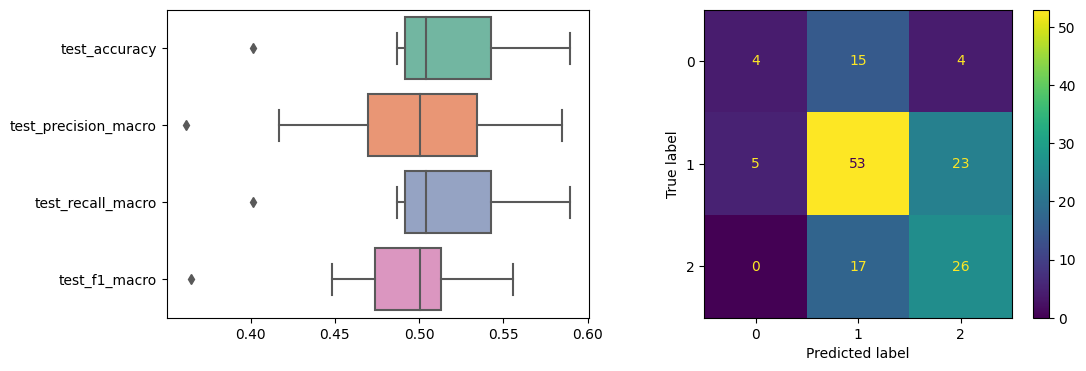

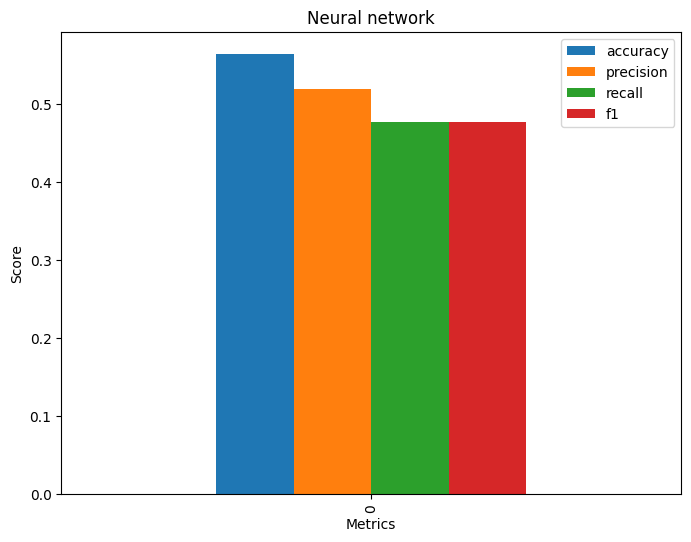

In [52]:
model = Sequential()
model.add(Dense(250,input_dim=input_dim, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

normalizer = Normalizer()

x = normalizer.fit_transform(X_selected)
y_integer = y.astype('category').cat.codes
y_categorical = keras.utils.to_categorical(y_integer, num_classes)

X_train, X_test, y_train, y_test = train_test_split(x, y_categorical, test_size=0.25, random_state=0)

model.fit(X_train, y_train, epochs=60, batch_size=128, verbose=1)

score = model.evaluate(X_test, y_test)
print(score)

y_pred = model.predict(X_test)

# Convert predictions from one-hot encoding to integers
y_pred_int = np.argmax(y_pred, axis=1)

# Convert true labels from one-hot encoding to integers
y_test_int = np.argmax(y_test, axis=1)

#Đánh giá kết quả dự đoán của mô hình trên Test Set
final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test_int, y_pred_int)],
                                 'precision': [precision_score(y_test_int, y_pred_int, average='macro')],
                                 'recall': [recall_score(y_test_int, y_pred_int, average='macro')],
                                 'f1': [f1_score(y_test_int, y_pred_int, average='macro')]})

print(final_scores)
#  Hiển thị kết quả đánh giá dưới dạng biểu đồ hộp và confusion matrix
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(data=results, orient="h", palette="Set2", ax=axs[0])
# Trực quan hóa kết quả đánh giá
fig, ax = plt.subplots(figsize=(8,6))
final_scores.plot(kind='bar', ax=ax)
# Đặt tiêu đề cho biểu đồ và các trục
plt.title('Neural network')
plt.xlabel('Metrics')
plt.ylabel('Score')

# Calculate confusion matrix
display_labels = [0,1,2]
cm = confusion_matrix(y_test_int, y_pred_int)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = display_labels)
disp.plot(ax=axs[1])
plt.show()

# Lưu kết quả đánh giá
# final_scores.to_csv('{}_final_scores.csv'.format(model.__class__.__name__), index=False)

BUILD AND EVALUATE SVM MODEL
A. Cross Validation on Training Set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.749524              0.744441           0.679673       0.700649
std         0.028631              0.046259           0.035693       0.038491
min         0.707143              0.668333           0.625576       0.634066
25%         0.728571              0.719771           0.657168       0.676316
50%         0.742857              0.737318           0.676866       0.702120
75%         0.771429              0.792389           0.700930       0.733460
max         0.800000              0.808977           0.759208       0.769058
B. Final Validation on Test Set
 accuracy  precision   recall      f1
     0.79   0.748048 0.722388 0.73392


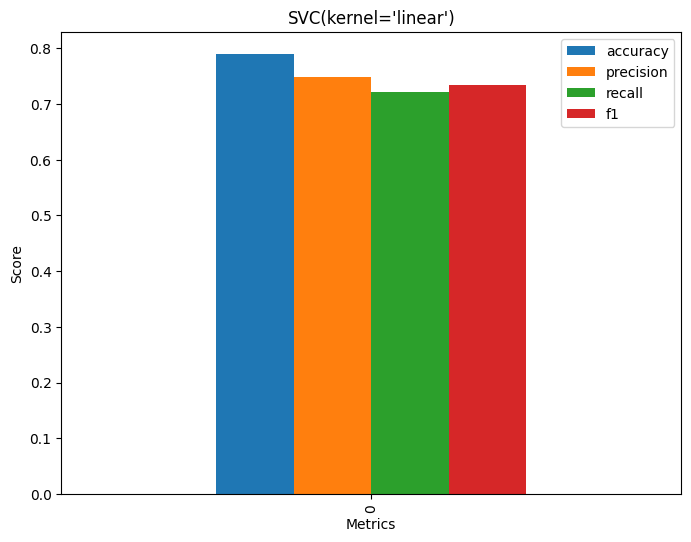

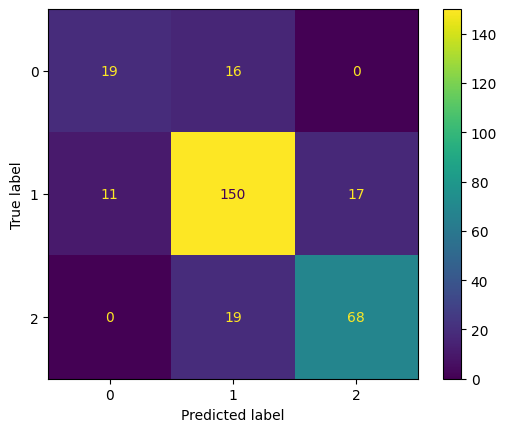

In [ ]:
# SVM	
from sklearn.svm import SVC
svc =  SVC(kernel='linear')
print('BUILD AND EVALUATE SVM MODEL')
build_and_eval_model(svc,'math score')

BUILD AND EVALUATE knn MODEL
A. Cross Validation on Training Set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.703810              0.684828           0.642265       0.655280
std         0.029925              0.037776           0.044123       0.040769
min         0.642857              0.597222           0.582178       0.600471
25%         0.685714              0.665713           0.610247       0.624322
50%         0.700000              0.683932           0.631172       0.647806
75%         0.728571              0.701831           0.666760       0.682020
max         0.764286              0.752414           0.750960       0.744462
B. Final Validation on Test Set
 accuracy  precision  recall       f1
 0.713333   0.652408 0.66383 0.657796


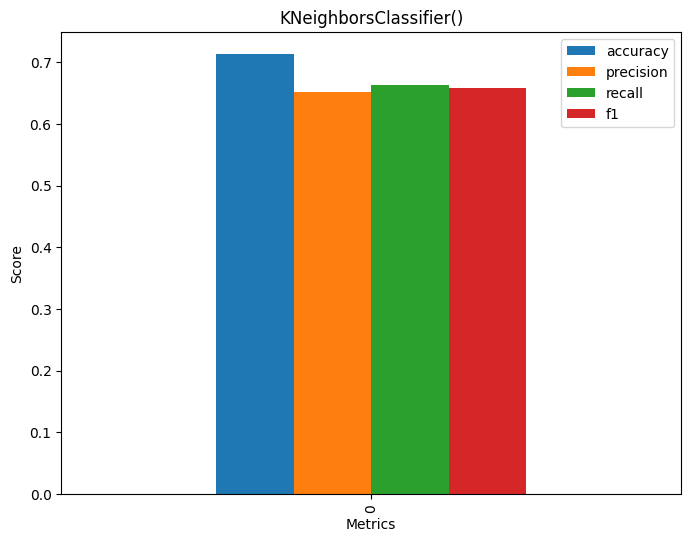

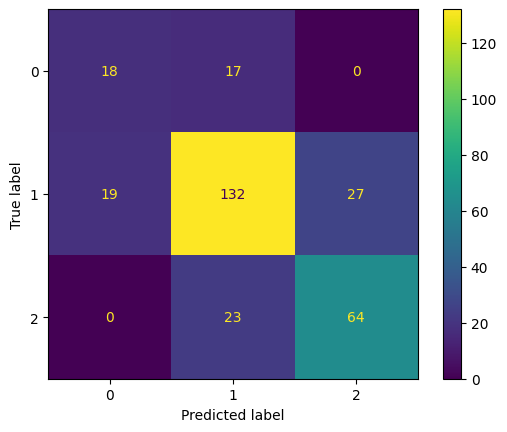

In [ ]:
# k-NN	
knn = KNeighborsClassifier(n_neighbors = 5)
print('BUILD AND EVALUATE knn MODEL')
build_and_eval_model(knn,'math score')

BUILD AND EVALUATE gau MODEL
A. Cross Validation on Training Set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.745714              0.735859           0.689592       0.704961
std         0.035386              0.043199           0.032904       0.034611
min         0.692857              0.677869           0.641470       0.662366
25%         0.725000              0.703674           0.669771       0.675080
50%         0.742857              0.717778           0.677869       0.701473
75%         0.767857              0.772117           0.703201       0.722929
max         0.800000              0.806935           0.764062       0.777226
B. Final Validation on Test Set
 accuracy  precision   recall       f1
 0.746667   0.704959 0.715304 0.708578


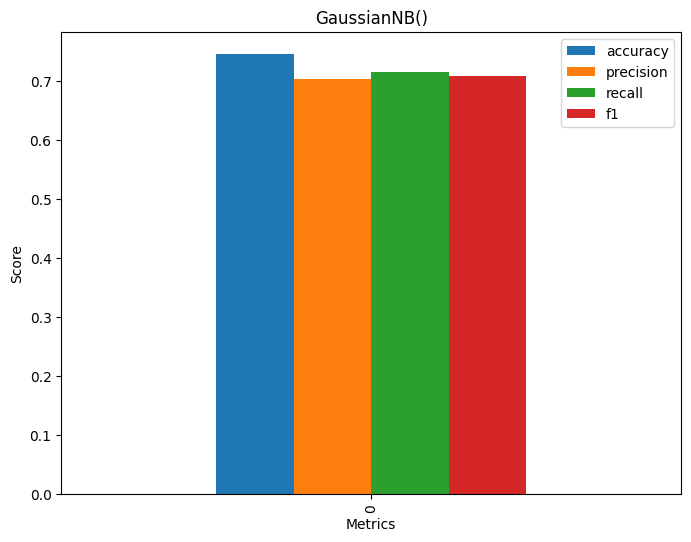

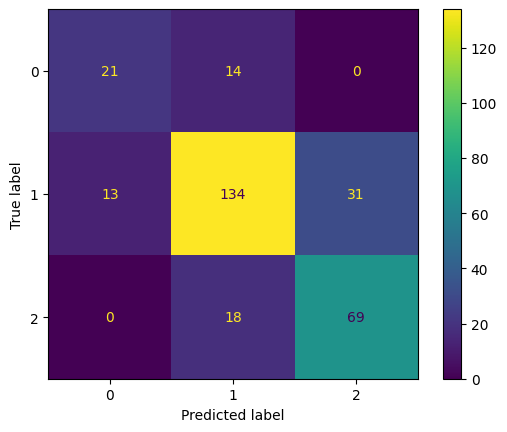

In [ ]:
# Naive Bayes	
from sklearn.naive_bayes import GaussianNB
gau = GaussianNB()
print('BUILD AND EVALUATE gau MODEL')
build_and_eval_model(gau,'math score')


BUILD AND EVALUATE randonforest MODEL
A. Cross Validation on Training Set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.715238              0.696135           0.680898       0.685206
std         0.033270              0.041994           0.031238       0.032413
min         0.671429              0.635346           0.620212       0.634088
25%         0.692857              0.671246           0.659421       0.665452
50%         0.707143              0.696286           0.683484       0.681075
75%         0.728571              0.707368           0.700595       0.704305
max         0.800000              0.811111           0.735818       0.761465
B. Final Validation on Test Set
 accuracy  precision   recall       f1
     0.72   0.663823 0.709933 0.681564


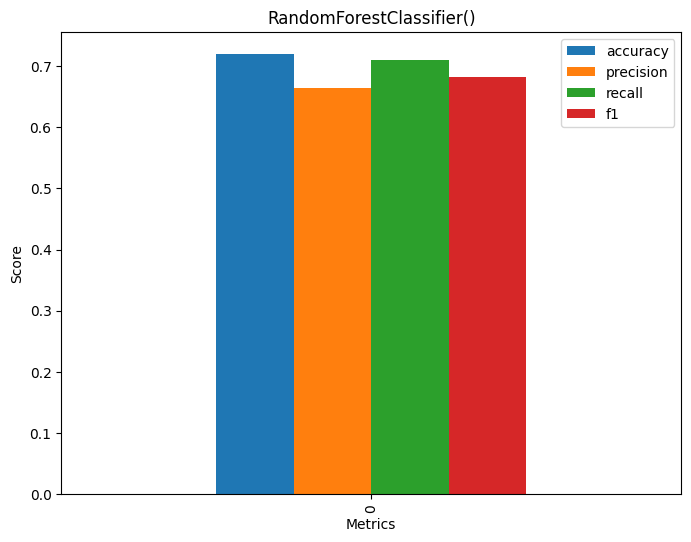

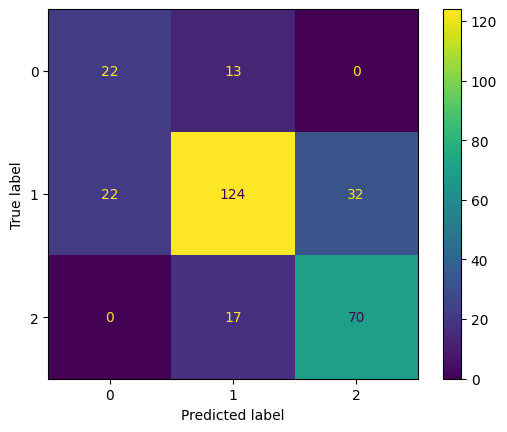

In [ ]:
# Random Forest	
from sklearn.ensemble import RandomForestClassifier
randonforest =RandomForestClassifier(n_estimators=100)
print('BUILD AND EVALUATE randonforest MODEL')
build_and_eval_model(randonforest,'math score')

BUILD AND EVALUATE tree MODEL
A. Cross Validation on Training Set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.755238              0.753521           0.675131       0.698938
std         0.018795              0.046732           0.023008       0.026929
min         0.721429              0.679167           0.636603       0.645268
25%         0.742857              0.731023           0.662908       0.681862
50%         0.757143              0.739098           0.671217       0.695833
75%         0.764286              0.778994           0.692423       0.714419
max         0.785714              0.857904           0.710708       0.744219
B. Final Validation on Test Set
 accuracy  precision   recall       f1
 0.793333    0.74871 0.745439 0.746753


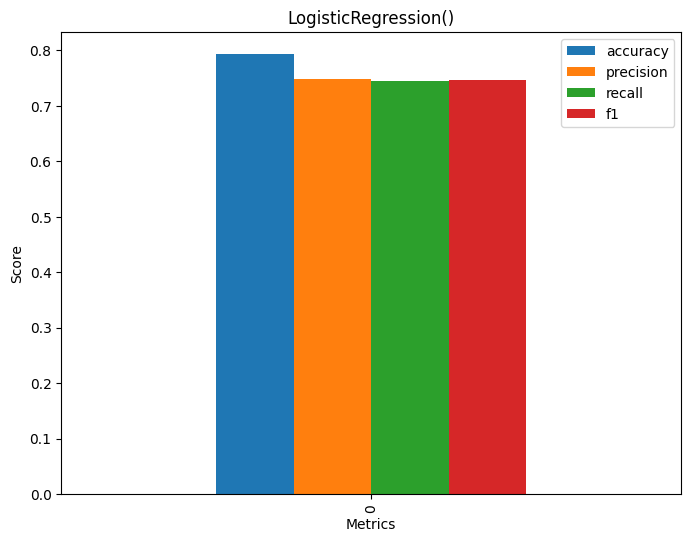

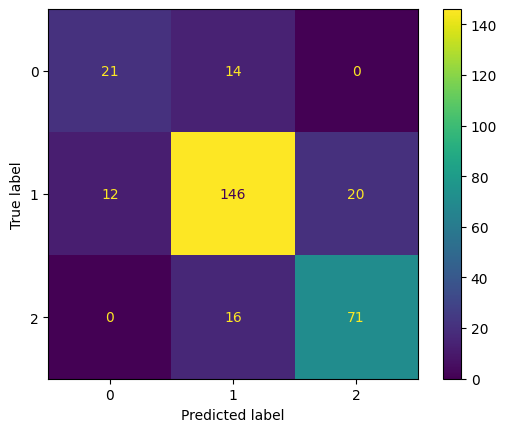

In [ ]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
print('BUILD AND EVALUATE tree MODEL')
build_and_eval_model(logistic,'math score')

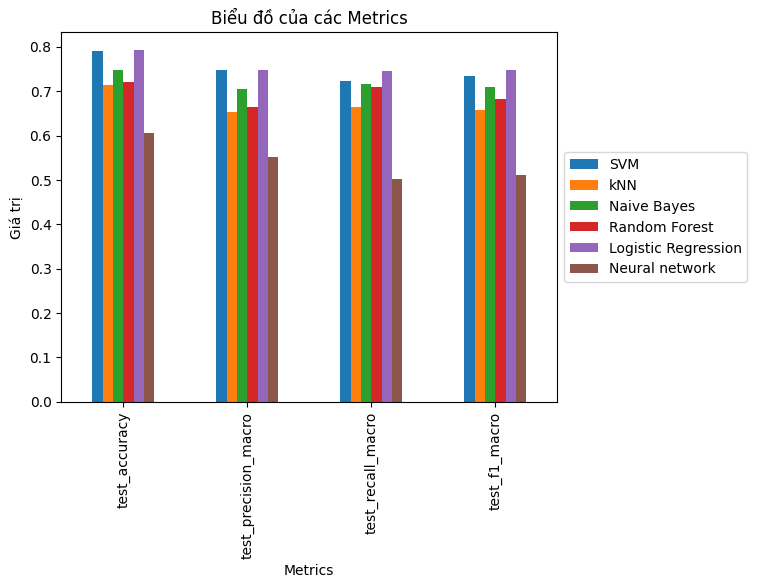

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Tạo dataframe mẫu
dataColection = {
    'Metrics': ['test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_macro'],
    'SVM': [ 0.79 ,  0.748048, 0.722388, 0.73392],
    'kNN': [0.713333,   0.652408, 0.66383, 0.657796],
    'Naive Bayes': [0.746667,   0.704959, 0.715304, 0.708578],
    'Random Forest': [ 0.72 ,  0.663823, 0.709933, 0.681564],
    'Logistic Regression': [ 0.793333 ,   0.74871, 0.745439, 0.746753],
    'Neural network': [0.605442,   0.552542,  0.501787,  0.51164]
}

df = pd.DataFrame(dataColection)

# Vẽ biểu đồ cột
df.plot(x='Metrics', kind='bar')
plt.xlabel('Metrics')
plt.ylabel('Giá trị')
plt.title('Biểu đồ của các Metrics')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()